In [57]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns  

In [58]:
df = pd.read_csv('Salary_Data.csv')
df.head(10)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


-Data is labelled so this is a supervised learning problem
-The dependent feature has continuous numerical values, therefore the task is to predict continuous numerical values hence it is regression problem

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [60]:
df.duplicated().sum()

0

In [61]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

C:\Users\celia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

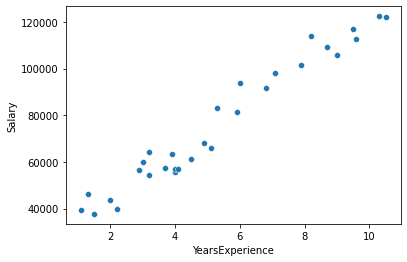

In [62]:
sns.scatterplot(df.YearsExperience, df.Salary)

-The relationship between the independent and dependent feature is linear hence this problem can be solved by simple regression.

<AxesSubplot:ylabel='Salary'>

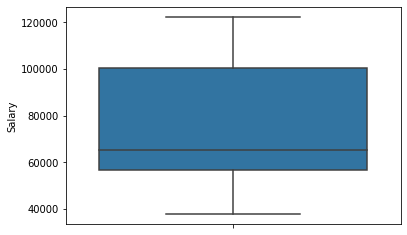

In [63]:
sns.boxplot(y = df.Salary)

In [64]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [65]:
X = df[['YearsExperience']].values
#X.shape
Y = df[['Salary']].values

In [66]:
print('Independent feature shape : ', X.shape)
print('Dependent feature shape   :', Y.shape)

Independent feature shape :  (30, 1)
Dependent feature shape   : (30, 1)


In [67]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 5)

In [68]:
print('Training data shape   : ', x_train.shape)
print('Training labels shape : ', y_train.shape)
print('Testing data shape    : ', x_test.shape)
print('Testing data shape    : ', y_test.shape)

Training data shape   :  (21, 1)
Training labels shape :  (21, 1)
Testing data shape    :  (9, 1)
Testing data shape    :  (9, 1)


In [69]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [70]:
reg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [71]:
reg.coef_

array([[9298.06674988]])

In [72]:
reg.intercept_

array([27182.22562441])

## Y' = wX + b
## Y'' = 9298.07*X+27182.23

In [73]:
reg.predict(x_test)

array([[ 64374.49262392],
       [124811.92649812],
       [103426.3729734 ],
       [110864.82637331],
       [ 82040.81944869],
       [ 63444.68594893],
       [ 41129.32574923],
       [ 65304.29929891],
       [115513.85974824]])

In [74]:
reg.predict([[3]])

array([[55076.42587404]])

In [75]:
9298.07*3+27182.23

55076.44

In [76]:
reg.score(x_test, y_test)

0.9624024983951907

In [77]:
print('Testing data score: ', reg.score(x_test,y_test))

Testing data score:  0.9624024983951907


In [78]:
print('Training data score : ', reg.score(x_train, y_train))

Training data score :  0.9499163703220002


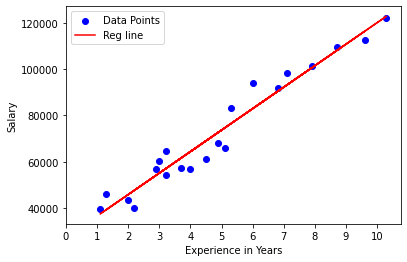

In [79]:
plt.figure()
plt.scatter(x_train, y_train, color = 'blue', label = 'Data Points')
plt.plot(x_train, reg.predict(x_train), color = 'red', label = 'Reg line')
plt.xticks(range(0,11))
plt.xlabel('Experience in Years')
plt.ylabel('Salary')
plt.legend()

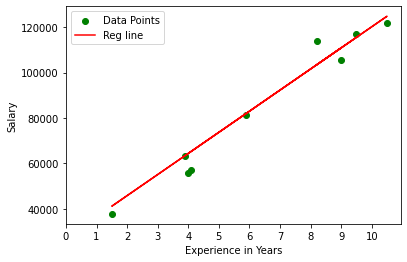

In [80]:
plt.figure()
plt.scatter(x_test, y_test, color = 'green', label = 'Data Points')
plt.plot(x_test, reg.predict(x_test), color = 'red', label = 'Reg line')
plt.xticks(range(0,11))
plt.xlabel('Experience in Years')
plt.ylabel('Salary')
plt.legend()

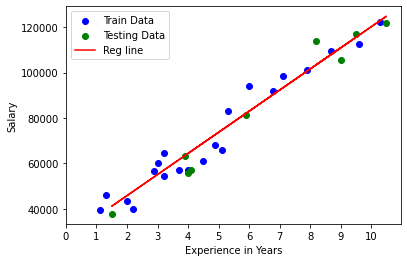

In [81]:
plt.figure()
plt.scatter(x_train, y_train, color = 'blue', label = 'Train Data')
plt.scatter(x_test, y_test, color = 'green', label = 'Testing Data')
plt.plot(x_test, reg.predict(x_test), color = 'red', label = 'Reg line')
plt.xticks(range(0,11))
plt.xlabel('Experience in Years')
plt.ylabel('Salary')
plt.legend()

In [82]:
c1 = x_test.ravel()
c2 = reg.predict(x_test).ravel()
df2 = pd.DataFrame({'Actual_Values' : c1, 'Predicted_Values' : c2}, index = range(0,9))
df2

,Actual_Values,Predicted_Values
0,4.0,64374.492624
1,10.5,124811.926498
2,8.2,103426.372973
3,9.0,110864.826373
4,5.9,82040.819449
5,3.9,63444.685949
6,1.5,41129.325749
7,4.1,65304.299299
8,9.5,115513.859748


In [84]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y, reg.predict(X))

31790407.817226358

In [85]:
reg.predict([[15]])

array([[166653.22687257]])